In [50]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#nltk.download_shell()

In [3]:
# UCI Machine learning datasets are good

In [53]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names= ["labels", "message"])

In [54]:
messages

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [55]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [60]:
# to see the number of characters in the meassages:
messages['length'] = messages['message'].apply(len)

In [62]:
# Time to visualze the data:

SyntaxError: unmatched ')' (938084357.py, line 3)

<AxesSubplot:xlabel='length', ylabel='Count'>

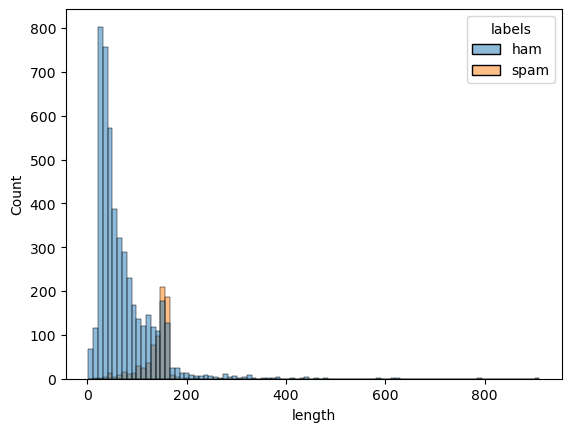

In [64]:
sns.histplot(data = messages, x = messages['length'], hue = 'labels')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

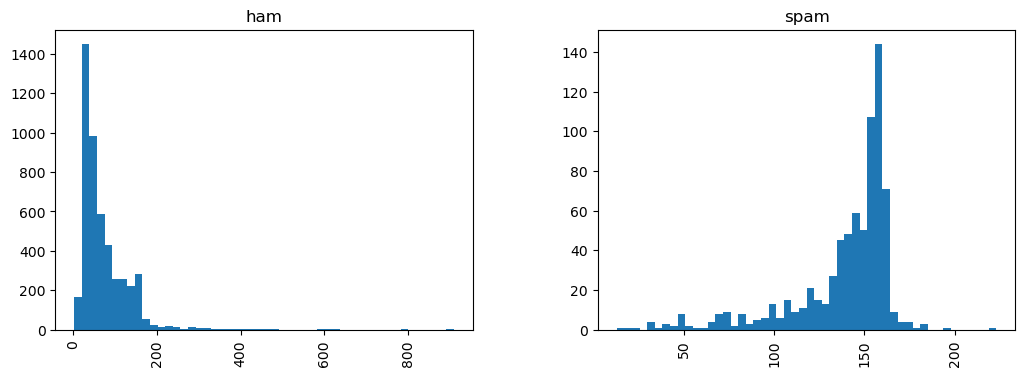

In [66]:
messages.hist(column='length', by='labels', bins=50,figsize=(12,4))

In [84]:
mess_ham = messages[messages['labels'] == 'ham']
mess_spam = messages[messages['labels'] == 'spam']

Text(0.5, 1.0, 'spam')

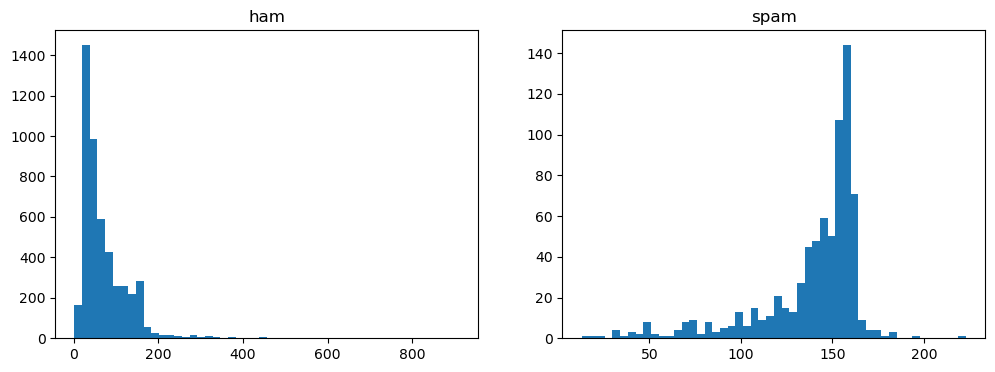

In [85]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

ax1.hist(data = mess_ham, x = 'length', bins=50)
ax1.set_title("ham")
ax2.hist(data = mess_spam, x = 'length',bins=50)
ax2.set_title("spam")


In [88]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [110]:
sample = " This message was deleted!!!!"

no_punc = [char for char in sample if char not in string.punctuation]
no_punc = ''.join(no_punc)

In [111]:
from nltk.corpus import stopwords

In [112]:
#stopwords.words('english')

clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [113]:
clean_mess

['message', 'deleted']

In [114]:
# Lets put this process in one function:

def text_process(sample):
    no_punc = [char for char in sample if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    return clean_mess

In [116]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer= text_process).fit(messages['message'])
messages_bow = bow_transformer.transform(messages['message'])

In [124]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [125]:
from sklearn.naive_bayes import MultinomialNB

spam_model = MultinomialNB().fit(messages_tfidf, messages['labels'])


In [126]:
# Create pipleine:
from sklearn.pipeline import Pipeline

In [ ]:
pipeee = Pipeline([])